Titanic Kaggle Project

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [18]:
#Load the Data
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

In [19]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
train_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data Cleaning

In [23]:
# Drop columns not useful
train_df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)
test_df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)

# Fill missing Age and Fare
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# Fill missing Embarked
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_36436\2266592524.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_36436\2266592524.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [25]:
# Encode 'Sex' and 'Embarked'
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

le_sex.fit(pd.concat([train_df['Sex'], test_df['Sex']]))
le_embarked.fit(pd.concat([train_df['Embarked'], test_df['Embarked']]))

train_df['Sex'] = le_sex.transform(train_df['Sex'])
test_df['Sex'] = le_sex.transform(test_df['Sex'])

train_df['Embarked'] = le_embarked.transform(train_df['Embarked'])
test_df['Embarked'] = le_embarked.transform(test_df['Embarked'])

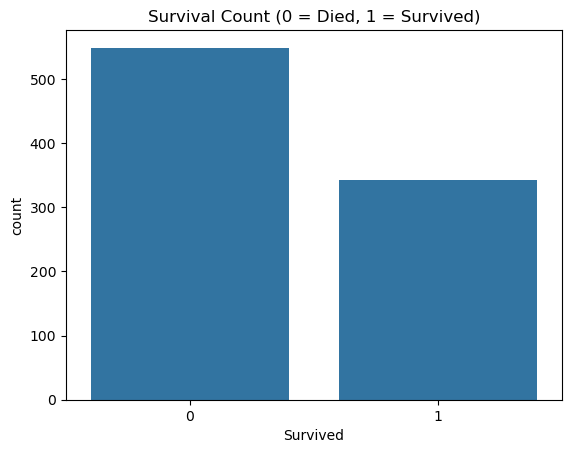

In [32]:
sns.countplot(data=train_df, x='Survived')
plt.title('Survival Count (0 = Died, 1 = Survived)')
plt.show()

In [33]:
# Separate features and target
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

# Split into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on validation set
y_pred = model.predict(X_val)

# Evaluate
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.8212290502793296
Confusion Matrix:
 [[92 13]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [36]:
# Use trained model to predict on actual test data
test_predictions = model.predict(test_df)

# View first 10 predictions
print(test_predictions[:10])


[0 0 0 1 0 0 0 0 1 0]


In [37]:
# Re-load test data to get PassengerId (or use backup if you saved it)
original_test = pd.read_csv('data/test.csv')

submission = pd.DataFrame({
    'PassengerId': original_test['PassengerId'],
    'Survived': test_predictions
})

submission.to_csv('submission.csv', index=False)
print("Submission file saved!")

Submission file saved!


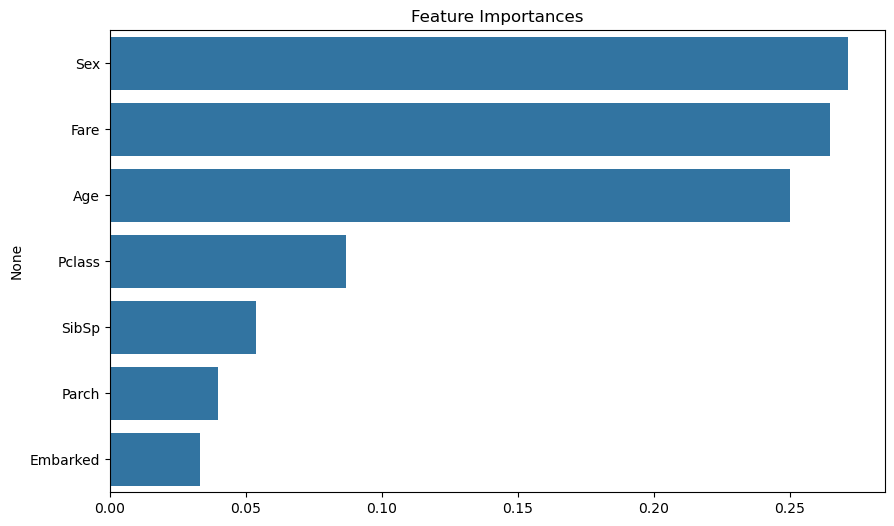

In [38]:
import matplotlib.pyplot as plt

# Plot feature importances
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
sns.barplot(x=importances[indices], y=features[indices])
plt.show()